In [1]:
# libraries
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from PDM2PCM import *
from PCM2PDM import *

In [8]:
def plot(pcm_os, pdm, pcm, os, fs):
    fig, axs = plt.subplots(nrows=2, ncols=3, dpi=100, figsize=(12,6))
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=.3, hspace=.5)

    fs_pcm = fs
    fs_pdm = os*fs

    n_pdm = len(pdm)
    t_pdm = np.arange(n_pdm)/fs_pdm
    f_pdm = (np.arange(n_pdm/2)*fs_pdm/n_pdm)[:n_pdm // 2]

    n_pcm = len(pcm)
    t_pcm = np.arange(n_pcm)/fs_pcm
    f_pcm = (np.arange(n_pcm/2)*fs_pcm/n_pcm)[:n_pcm // 2]

    mag_pcm_os = 20*np.log10(np.abs(np.fft.fft(pcm_os)) / n_pdm)[:n_pdm // 2]
    mag_pdm    = 20*np.log10(np.abs(np.fft.fft(pdm))    / n_pdm)[:n_pdm // 2]
    mag_pcm    = 20*np.log10(np.abs(np.fft.fft(pcm))    / n_pcm)[:n_pcm // 2]

    axs[0,0].step(t_pdm, pcm_os, 'k')
    axs[0,1].step(t_pdm, pdm, 'k')
    axs[0,2].step(t_pcm, pcm, 'k')

    axs[1,0].plot(f_pdm, mag_pcm_os, 'k')
    axs[1,1].plot(f_pdm, mag_pdm, 'k')
    axs[1,2].plot(f_pcm, mag_pcm, 'k')

    axs[0,0].set_ylabel('Amplitude'); axs[0,1].set_ylabel('Amplitude'); axs[0,2].set_ylabel('Amplitude')
    axs[1,0].set_ylabel('Magnitude'); axs[1,1].set_ylabel('Magnitude'); axs[1,2].set_ylabel('Magnitude')
    axs[0,0].set_xlabel('Time (s)'); axs[0,1].set_xlabel('Time (s)'); axs[0,2].set_xlabel('Time (s)')
    axs[1,0].set_xlabel('Frequency (Hz)'); axs[1,1].set_xlabel('Frequency (Hz)'); axs[1,2].set_xlabel('Frequency (Hz)')
    axs[0,0].set_title('Time domain (PCM-OS)'); axs[0,1].set_title('Time domain (PDM)'); axs[0,2].set_title('Time domain (PCM)')
    axs[1,0].set_title('Frequency domain (PCM-OS)'); axs[1,1].set_title('Frequency domain (PDM)'); axs[1,2].set_title('Frequency domain (PCM)')

    plt.show()    

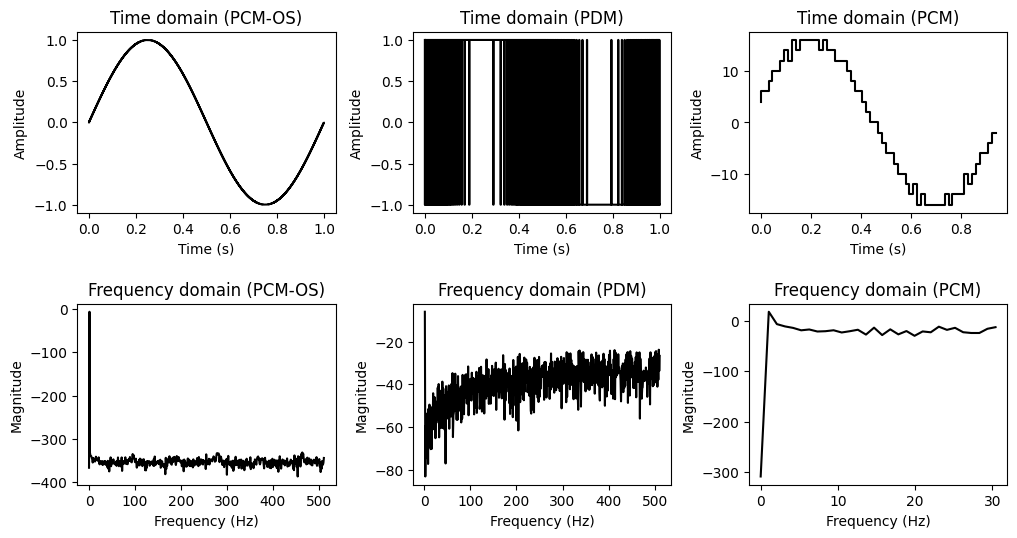

In [9]:
# sine
n = 1024
os = 2**4
fs_pdm = 1024
fs_pcm = fs_pdm/os

R = os
M = 1
N = 1

pcm_data = np.sin(2*np.pi*np.arange(n)/fs_pdm)
pdm_stream = PCM2PDM(pcm_data, fs_pcm, os).data_pdm
pcm_data_conv = PDM2PCM(pdm_stream, fs_pdm, R, N, M).data_pcm

plot(pcm_data, pdm_stream, pcm_data_conv, os, fs_pcm)

np.savetxt(X=pdm_stream==1, fmt="%d", newline=", ", delimiter="", fname="sine_pdm.txt")